<a href="https://colab.research.google.com/github/SabhyaGrover/ML-Coursework/blob/main/ml_lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Assignment 4**
**(Based on Linear Regression and Sampling Methods)**

In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

Mounted at /content/gdrive


In [ ]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command
%pwd

/content/gdrive/My Drive/Kaggle


'/content/gdrive/My Drive/Kaggle'

In [ ]:
import pandas as pd
dataset=pd.read_csv('USA_Housing.csv')
dataset.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
# get the info of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


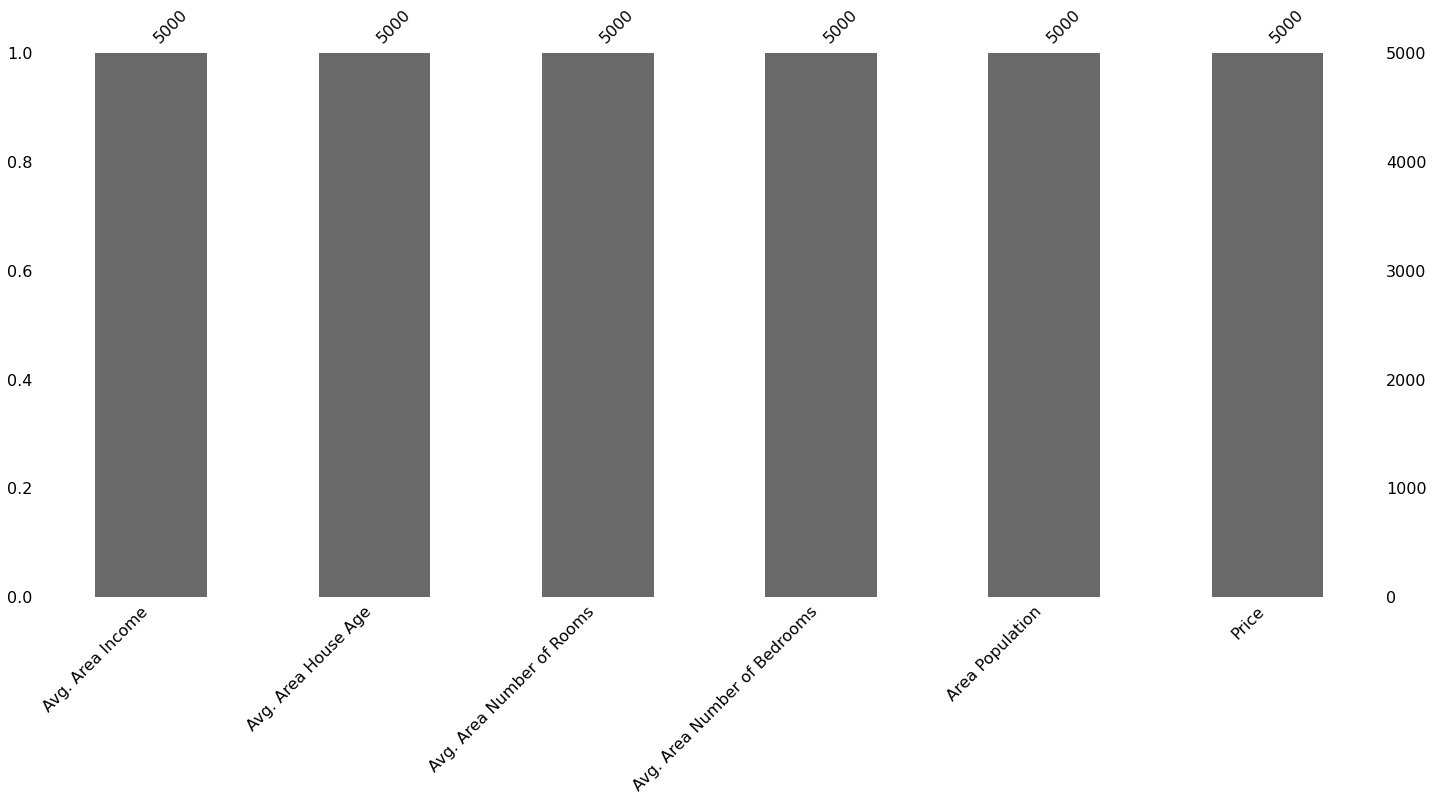

In [ ]:
# check for null values using missno library
import missingno as ms
ms.bar(dataset)

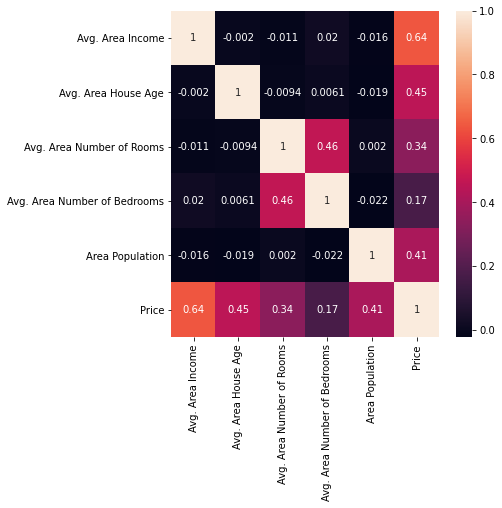

In [ ]:
# Analysis using HeatMap
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Get Correlation Matrix
corrmat = dataset.corr()
#Plotting HeatMap
plt.figure(figsize = (6,6))
sns.heatmap(corrmat,annot = True)
# Since correlation between features is less than(0.7 or 0.8)
# Thus, feature selection/extraction is not required

In [ ]:
# https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

In [ ]:
import numpy as np
# divide the dataset into input features and output variable
input=dataset.iloc[:,0:5]
output=dataset.iloc[:,-1]
output=np.array(output)
output=output.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
scaler = StandardScaler()
# scale the values of input features
input_scaled = scaler.fit_transform(input)
input_scaled = pd.DataFrame(input_scaled, columns = input.columns.values)
input_scaled

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,1.028660,-0.296927,0.021274,0.088062,-1.317599
1,1.000808,0.025902,-0.255506,-0.722301,0.403999
2,-0.684629,-0.112303,1.516243,0.930840,0.072410
3,-0.491499,1.221572,-1.393077,-0.584540,-0.186734
4,-0.807073,-0.944834,0.846742,0.201513,-0.988387
...,...,...,...,...,...
4995,-0.752109,1.869297,-0.845588,-0.422467,-1.342732
4996,0.929740,1.030822,-0.408686,0.031337,-1.062747
4997,-0.487235,1.284470,-2.170269,-1.500251,-0.291937
4998,-0.054592,-0.446694,0.141541,1.182053,0.651116


#**Q1: K-Fold Cross Validation for Multiple Linear Regression (Least Square Error Fit)**

In [ ]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
# Define the no of Folds
k=5
kf=KFold(n_splits=k)
model = LinearRegression()
accuracy = []
for train_index, test_index in kf.split(input_scaled):
  # Splitting the data into Train and Test Data for a ffold
  x_train,x_test = input_scaled.iloc[train_index,:],input_scaled.iloc[test_index,:]
  y_train,y_test = output[train_index], output[test_index]
  # Fitting the model for that fit
  model.fit(x_train,y_train)
  print("Corresponding Beta Matrix:")
  # Get the regression coefficients for the model fitted
  print(model.coef_)
  # Predict the target value with the help of regression coefficiennts obtained
  pred=model.predict(x_test)
  print("R2 Score:")
  acc=r2_score(y_test,pred)
  print(acc)
  accuracy.append(acc)

print("Avg Accuracy:",sum(accuracy)/k)
 

Corresponding Beta Matrix:
[[229923.70318635 164052.98579011 120923.57426579   3533.77470973
  151855.58542488]]
R2 Score:
0.9175899480765107
Corresponding Beta Matrix:
[[228365.32287054 165201.14881927 122539.46855211   1697.03433458
  150055.81710562]]
R2 Score:
0.920301549640113
Corresponding Beta Matrix:
[[230730.20810582 163554.55706976 121669.08713233   2620.25215054
  150923.12489298]]
R2 Score:
0.9152429915320015
Corresponding Beta Matrix:
[[229921.55808488 164523.05364133 119737.50719163   1124.25658753
  151317.80239611]]
R2 Score:
0.9208503836977656
Corresponding Beta Matrix:
[[230778.59921985 163755.13607252 121885.1351222    1247.01304382
  150084.29759618]]
R2 Score:
0.9138111758717495
Avg Accuracy: 0.9175592097636281


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(input_scaled, output, test_size=0.3)
# Trainig the regressor for 70% data
model.fit(X_train,Y_train)
# Testing for the rest 30% data
Y_pred=model.predict(X_test)
print(r2_score(Y_test,Y_pred))

0.9203582440299638


#**Q2: Concept of Validation set for Multiple Linear Regression (Gradient Descent Optimization)**

In [ ]:
from sklearn.model_selection import train_test_split
# Splitting the data into testing, training and validating set
trainx,tempx,trainy,tempy = train_test_split(input_scaled,output,test_size=0.44)
testx,valx,testy,valy = train_test_split(tempx,tempy,test_size=0.14)

**hypothesis()**: 

It is the function that calculates and outputs the hypothesis value of the Target Variable, given theta (theta_0, theta_1, theta_2, theta_3, …., theta_n), Features in a matrix, X of dimension [m X (n+1)] where m is the number of samples and n is the number of features

In [ ]:
def hypothesis(theta, X, n):
    h = np.ones((X.shape[0],1))
    theta = theta.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        h[i] = float(np.matmul(theta, X[i]))
    #print("h:",h)
    return h

**BGD():** 

It is the function that performs the Batch Gradient Descent Algorithm taking current value of theta (theta_0, theta_1,…, theta_n), learning rate (alpha), number of iterations (num_iters), list of hypothesis values of all samples (h), feature set (X), Target Variable set (y) and Number of Features (n) as input and outputs the optimized theta (theta_0, theta_1, theta_2, theta_3, …, theta_n) and the cost history or cost which contains the value of the cost function over all the iterations.

In [ ]:
def BGD(theta, alpha, num_iters, h, X, y, n):
    cost = np.ones(num_iters)
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            theta[j] = theta[j] - alpha * (sum((h-y).reshape(X.shape[0]) * X.transpose()[j]))/X.shape[0]
        h = hypothesis(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    return theta, cost

**linear_regression():** 

It is the principal function that takes the features matrix (X), Target Variable Vector (y), learning rate (alpha) and number of iterations (num_iters) as input and outputs the final optimized theta i.e., the values of [theta_0, theta_1, theta_2, theta_3,….,theta_n] for which the cost function almost achieves minima following Batch Gradient Descent, and cost which stores the value of cost for every iteration

In [ ]:
def linear_regression(X, y, alpha, num_iters):
    n = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    # initializing the parameter vector...
    theta = np.zeros(n+1)
    # hypothesis calculation....
    h = hypothesis(theta, X, n)
    # returning the optimized parameters by Gradient Descent...
    theta, cost = BGD(theta,alpha,num_iters,h,X,y,n)
    return theta, cost

**Prediction with different learning values**

theta: [[778914.98863868 151046.73693357 103005.093096    72938.74199243
   23634.31328242  87055.27374316]]
r2_score: -0.8629664796995873


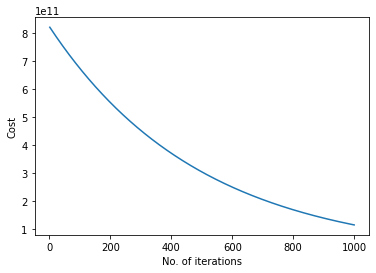

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
# calling the principal function with learning_rate = 0.001 and 
# num_iters = 1000
theta1, cost1 = linear_regression(tempx,tempy,0.001, 1000)
print("theta:",theta1)
cost1 = list(cost1)
n_iterations = [x for x in range(1,1001)]
# plot the cost functions
plt.plot(n_iterations, cost1)
# The cost kept going down with each iteration. 
# This is the indication that the algorithm worked well.
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
# Getting the predictions...
train1 = np.concatenate((np.ones((tempx.shape[0],1)), tempx),axis = 1)
predictions1 = hypothesis(theta1, train1, train1.shape[1] - 1)
# Calculating accuracy
print("r2_score:",r2_score(tempy,predictions1))

theta: [[1229826.26072675  227733.94127196  164461.21613929  120784.61098896
     2984.71919154  149445.43701866]]
r2_score: 0.9137723503051564


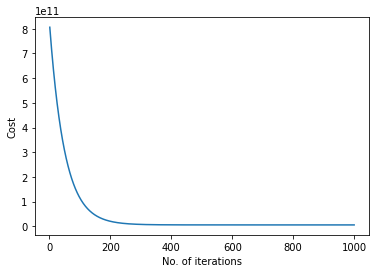

In [ ]:
# calling the principal function with learning_rate = 0.01 and 
# num_iters = 1000
theta2, cost2 = linear_regression(tempx,tempy,0.01, 1000)
print("theta:",theta2)
cost2 = list(cost2)
n_iterations = [x for x in range(1,1001)]
# plot the cost functions
plt.plot(n_iterations, cost2)
# The cost kept going down with each iteration. 
# This is the indication that the algorithm worked well.
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
# Getting the predictions...
train2 = np.concatenate((np.ones((tempx.shape[0],1)), tempx),axis = 1)
predictions2 = hypothesis(theta2, train2, train2.shape[1] - 1)
# Calculating accuracy
print("r2_score:",r2_score(tempy,predictions2))

theta: [[1229874.57706521  227759.99614175  164484.83560802  121029.03568164
     2740.36585231  149439.56224991]]
r2_score: 0.9137729020857887


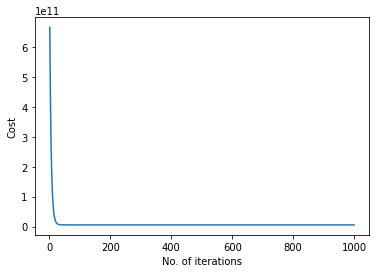

In [ ]:
# calling the principal function with learning_rate = 0.1 and 
# num_iters = 1000
theta3, cost3 = linear_regression(tempx,tempy,0.1, 1000)
print("theta:",theta3)
cost3 = list(cost3)
n_iterations = [x for x in range(1,1001)]
# plot the cost functions
plt.plot(n_iterations, cost3)
# The cost kept going down with each iteration. 
# This is the indication that the algorithm worked well.
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
# Getting the predictions...
train3 = np.concatenate((np.ones((tempx.shape[0],1)), tempx),axis = 1)
predictions3 = hypothesis(theta3, train3, train3.shape[1] - 1)
# Calculating accuracy
print("r2_score:",r2_score(tempy,predictions3))

theta: [[1229874.57706521  227759.99614175  164484.83560802  121029.03568164
     2740.36585231  149439.56224991]]
r2_score: 0.9137729020857887


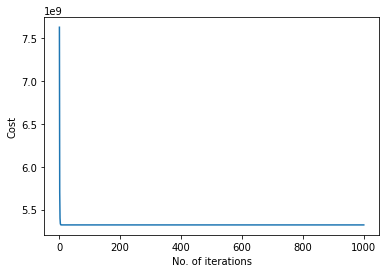

In [ ]:
# calling the principal function with learning_rate = 1 and 
# num_iters = 1000
theta4, cost4 = linear_regression(tempx,tempy,1, 1000)
print("theta:",theta4)
cost4 = list(cost4)
n_iterations = [x for x in range(1,1001)]
# plot the cost functions
plt.plot(n_iterations, cost4)
# The cost kept going down with each iteration. 
# This is the indication that the algorithm worked well.
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
# Getting the predictions...
train4 = np.concatenate((np.ones((tempx.shape[0],1)), tempx),axis = 1)
predictions4 = hypothesis(theta4, train4, train4.shape[1] - 1)
# Calculating accuracy
print("r2_score:",r2_score(tempy,predictions4))

**Conclusion: Learning rate of 0.1 gives the best results**

**Best values of regression coefficients:**

[[1229874.57706521  227759.99614175  164484.83560802  121029.03568164
     2740.36585231  149439.56224991]]

#**Q3: Pre-processing and Multiple Linear Regression**

**1. Load the dataset with following column names ["symboling", "normalized_losses",
"make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels",
"engine_location", "wheel_base", "length", "width", "height", "curb_weight",
"engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke",
"compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
and replace all ? values with NaN**

In [ ]:
# Retrieve data from link
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data

--2021-04-12 16:20:09--  https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25936 (25K) [application/x-httpd-php]
Saving to: ‘imports-85.data.3’

imports-85.data.3   100%[===================>]  25.33K  --.-KB/s    in 0.1s    

2021-04-12 16:20:10 (196 KB/s) - ‘imports-85.data.3’ saved [25936/25936]



In [ ]:
import pandas as pd
columns_list=["symboling", "normalized_losses","make", "fuel_type", "aspiration","num_doors", "body_style", "drive_wheels","engine_location", "wheel_base", "length", "width", "height", "curb_weight","engine_type", "num_cylinders", "engine_size", "fuel_system", "bore", "stroke","compression_ratio", "horsepower", "peak_rpm", "city_mpg", "highway_mpg", "price"]
# Read data with given column names
df=pd.read_csv("imports-85.data",names=columns_list)

In [ ]:
# Replace ? with NaN
import numpy as np
df[columns_list] = df[columns_list].replace({"?":np.nan})
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


**3. There are 10 columns in the dataset with non-numeric values. Convert these values to
numeric values using following scheme:

(i) For “num_doors” and “num_cylinders”: convert words (number names) to figures
for e.g., two to 2

(ii) For "body_style", "drive_wheels": use dummy encoding scheme

(iii) For “make”, “aspiration”, “engine_location”,fuel_type: use label encoding
scheme

(iv) For fuel_system: replace values containing string pfi to 1 else all values to 0.

(v) For engine_type: replace values containing string ohc to 1 else all values to 0.**

In [ ]:
# Check unique values for dictionary keys
print(df['num_cylinders'].unique())
print(df['num_doors'].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['two' 'four' nan]


In [ ]:
map={'one':1.0,'two':2.0,'three':3.0,'four':4.0,'five':5.0,'six':6.0,'seven':7.0,'eight':8.0,'nine':9.0,'twelve':12.0}
# i) Replace words with numerical values
df['num_doors'].replace(to_replace=map,inplace=True)
df['num_cylinders'].replace(to_replace=map,inplace=True)

In [ ]:
# ii.) dummy encoding scheme
body_ = pd.get_dummies(df.body_style,drop_first=True)
wheels_ = pd.get_dummies(df.drive_wheels,drop_first=True)
df = pd.concat([df, body_, wheels_], axis=1)
df.drop(columns=['body_style','drive_wheels'],inplace=True)
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,NaN,alfa-romero,gas,std,2.0,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,0,0,0,0,0,1
1,3,NaN,alfa-romero,gas,std,2.0,front,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,0,0,0,0,0,1
2,1,NaN,alfa-romero,gas,std,2.0,front,94.5,171.2,65.5,52.4,2823,ohcv,6.0,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0,1,0,0,0,1
3,2,164,audi,gas,std,4.0,front,99.8,176.6,66.2,54.3,2337,ohc,4.0,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,0,0,1,0,1,0
4,2,164,audi,gas,std,4.0,front,99.4,176.6,66.4,54.3,2824,ohc,5.0,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,4.0,front,109.1,188.8,68.9,55.5,2952,ohc,4.0,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,0,0,1,0,0,1
201,-1,95,volvo,gas,turbo,4.0,front,109.1,188.8,68.8,55.5,3049,ohc,4.0,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,0,0,1,0,0,1
202,-1,95,volvo,gas,std,4.0,front,109.1,188.8,68.9,55.5,3012,ohcv,6.0,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,0,0,1,0,0,1
203,-1,95,volvo,diesel,turbo,4.0,front,109.1,188.8,68.9,55.5,3217,ohc,6.0,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,0,0,1,0,0,1


In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce
# iii.) Label Encoding Scheme
colm=['make','aspiration','engine_location','fuel_type']
make_dict={'alfa-romero':0, 'audi':1, 'bmw':2, 'chevrolet':3, 'dodge':4, 'honda':5,
       'isuzu':6, 'jaguar':7, 'mazda':8, 'mercedes-benz':9, 'mercury':10,
       'mitsubishi':11, 'nissan':12, 'peugot':13, 'plymouth':14, 'porsche':15, 'renault':16,
       'saab':17, 'subaru':18, 'toyota':19, 'volkswagen':20, 'volvo':21}
asp_dict={'std':0, 'turbo':1}
eng_dict={'front':0, 'rear':1}
fuel_dict={'gas':0, 'diesel':1}
encoder = ce.OrdinalEncoder(cols=colm,return_df=True,mapping=[{'col':'make','mapping':make_dict},
                                                              {'col':'aspiration','mapping':asp_dict},
                                                              {'col':'engine_location','mapping':eng_dict},
                                                              {'col':'fuel_type','mapping':fuel_dict}])

df_ = encoder.fit_transform(df)
df=df_

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,NaN,0,0,0,2.0,0,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,0,0,0,0,0,1
1,3,NaN,0,0,0,2.0,0,88.6,168.8,64.1,48.8,2548,dohc,4.0,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,0,0,0,0,0,1
2,1,NaN,0,0,0,2.0,0,94.5,171.2,65.5,52.4,2823,ohcv,6.0,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,0,1,0,0,0,1
3,2,164,1,0,0,4.0,0,99.8,176.6,66.2,54.3,2337,ohc,4.0,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950,0,0,1,0,1,0
4,2,164,1,0,0,4.0,0,99.4,176.6,66.4,54.3,2824,ohc,5.0,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,21,0,0,4.0,0,109.1,188.8,68.9,55.5,2952,ohc,4.0,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845,0,0,1,0,0,1
201,-1,95,21,0,1,4.0,0,109.1,188.8,68.8,55.5,3049,ohc,4.0,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045,0,0,1,0,0,1
202,-1,95,21,0,0,4.0,0,109.1,188.8,68.9,55.5,3012,ohcv,6.0,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485,0,0,1,0,0,1
203,-1,95,21,1,1,4.0,0,109.1,188.8,68.9,55.5,3217,ohc,6.0,145,idi,3.01,3.40,23.0,106,4800,26,27,22470,0,0,1,0,0,1


In [ ]:
for i, row in df.iterrows():
  # iv.) v.) Replacing values in fuel system and engine type
  fuel=df.loc[i,'fuel_system']
  engine=df.loc[i,'engine_type']
  if "pfi" in fuel:
    df.at[i,'fuel_system'] = 1
  else:
    df.at[i,'fuel_system'] = 0
  if "ohc" in engine:
    df.at[i,'engine_type'] = 1
  else:
    df.at[i,'engine_type'] = 0
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,NaN,0,0,0,2.0,0,88.6,168.8,64.1,48.8,2548,1,4.0,130,1,3.47,2.68,9.0,111,5000,21,27,13495,0,0,0,0,0,1
1,3,NaN,0,0,0,2.0,0,88.6,168.8,64.1,48.8,2548,1,4.0,130,1,3.47,2.68,9.0,111,5000,21,27,16500,0,0,0,0,0,1
2,1,NaN,0,0,0,2.0,0,94.5,171.2,65.5,52.4,2823,1,6.0,152,1,2.68,3.47,9.0,154,5000,19,26,16500,0,1,0,0,0,1
3,2,164,1,0,0,4.0,0,99.8,176.6,66.2,54.3,2337,1,4.0,109,1,3.19,3.40,10.0,102,5500,24,30,13950,0,0,1,0,1,0
4,2,164,1,0,0,4.0,0,99.4,176.6,66.4,54.3,2824,1,5.0,136,1,3.19,3.40,8.0,115,5500,18,22,17450,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,21,0,0,4.0,0,109.1,188.8,68.9,55.5,2952,1,4.0,141,1,3.78,3.15,9.5,114,5400,23,28,16845,0,0,1,0,0,1
201,-1,95,21,0,1,4.0,0,109.1,188.8,68.8,55.5,3049,1,4.0,141,1,3.78,3.15,8.7,160,5300,19,25,19045,0,0,1,0,0,1
202,-1,95,21,0,0,4.0,0,109.1,188.8,68.9,55.5,3012,1,6.0,173,1,3.58,2.87,8.8,134,5500,18,23,21485,0,0,1,0,0,1
203,-1,95,21,1,1,4.0,0,109.1,188.8,68.9,55.5,3217,1,6.0,145,0,3.01,3.40,23.0,106,4800,26,27,22470,0,0,1,0,0,1


In [ ]:
from pandas.api.types import is_numeric_dtype
# Convert to numeric from object dtype
for c in df.columns:
  if not is_numeric_dtype(df[c]):
    df[c]=pd.to_numeric(df[c],errors='ignore')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    int64  
 3   fuel_type          205 non-null    int64  
 4   aspiration         205 non-null    int64  
 5   num_doors          203 non-null    float64
 6   engine_location    205 non-null    int64  
 7   wheel_base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb_weight        205 non-null    int64  
 12  engine_type        205 non-null    int64  
 13  num_cylinders      205 non-null    float64
 14  engine_size        205 non-null    int64  
 15  fuel_system        205 non-null    int64  
 16  bore               201 non

**2. Replace all NaN values with central tendency imputation.Drop the rows with NaN values in price column.**

In [ ]:
# Dropping rows with NaN price values
df = df[df['price'].notna()]
df

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,NaN,0,0,0,2.0,0,88.6,168.8,64.1,48.8,2548,1,4.0,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,0,0,0,0,1
1,3,NaN,0,0,0,2.0,0,88.6,168.8,64.1,48.8,2548,1,4.0,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,0,0,0,0,1
2,1,NaN,0,0,0,2.0,0,94.5,171.2,65.5,52.4,2823,1,6.0,152,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,1,0,0,0,1
3,2,164.0,1,0,0,4.0,0,99.8,176.6,66.2,54.3,2337,1,4.0,109,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,0,1,0,1,0
4,2,164.0,1,0,0,4.0,0,99.4,176.6,66.4,54.3,2824,1,5.0,136,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,0,0,4.0,0,109.1,188.8,68.9,55.5,2952,1,4.0,141,1,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0,0,1,0,0,1
201,-1,95.0,21,0,1,4.0,0,109.1,188.8,68.8,55.5,3049,1,4.0,141,1,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0,0,1,0,0,1
202,-1,95.0,21,0,0,4.0,0,109.1,188.8,68.9,55.5,3012,1,6.0,173,1,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0,0,1,0,0,1
203,-1,95.0,21,1,1,4.0,0,109.1,188.8,68.9,55.5,3217,1,6.0,145,0,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0,0,1,0,0,1


In [ ]:
# Using Mean as imputation value to fill out the NaN values
df.fillna(df.mean(),inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,122.0,0,0,0,2.0,0,88.6,168.8,64.1,48.8,2548,1,4.0,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,0,0,0,0,0,1
1,3,122.0,0,0,0,2.0,0,88.6,168.8,64.1,48.8,2548,1,4.0,130,1,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,0,0,0,0,0,1
2,1,122.0,0,0,0,2.0,0,94.5,171.2,65.5,52.4,2823,1,6.0,152,1,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,0,1,0,0,0,1
3,2,164.0,1,0,0,4.0,0,99.8,176.6,66.2,54.3,2337,1,4.0,109,1,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,0,0,1,0,1,0
4,2,164.0,1,0,0,4.0,0,99.4,176.6,66.4,54.3,2824,1,5.0,136,1,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,21,0,0,4.0,0,109.1,188.8,68.9,55.5,2952,1,4.0,141,1,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,0,0,1,0,0,1
201,-1,95.0,21,0,1,4.0,0,109.1,188.8,68.8,55.5,3049,1,4.0,141,1,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,0,0,1,0,0,1
202,-1,95.0,21,0,0,4.0,0,109.1,188.8,68.9,55.5,3012,1,6.0,173,1,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,0,0,1,0,0,1
203,-1,95.0,21,1,1,4.0,0,109.1,188.8,68.9,55.5,3217,1,6.0,145,0,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,0,0,1,0,0,1


In [ ]:
# Check for any NULL values
df.isnull().values.any()

False

**4. Divide the dataset into input features (all columns except price) and output variable (price). Scale all input features.**

In [ ]:
# Divide the dataset into Input and Output Features
input=df.drop(columns='price')
output=df['price']

In [ ]:
# Scale the values of input features

input_scaled = scaler.fit_transform(input)
input_scaled = pd.DataFrame(input_scaled, columns = input.columns.values)
input_scaled

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,hardtop,hatchback,sedan,wagon,fwd,rwd
0,1.725050,0.000000,-1.971717,-0.332411,-0.467099,-1.152024,-0.123091,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.294086,-0.343660,0.075389,1.077632,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,-0.203595,-0.715037,-0.937286,-0.376889,-1.192345,1.296148
1,1.725050,0.000000,-1.971717,-0.332411,-0.467099,-1.152024,-0.123091,-1.685107,-0.439409,-0.853460,-2.034081,-0.014858,0.294086,-0.343660,0.075389,1.077632,0.520894,-1.829927,-0.291435,0.203984,-0.246556,-0.652249,-0.542288,-0.203595,-0.715037,-0.937286,-0.376889,-1.192345,1.296148
2,0.127193,0.000000,-1.971717,-0.332411,-0.467099,-1.152024,-0.123091,-0.710103,-0.244152,-0.185597,-0.559713,0.518080,0.294086,1.548823,0.606234,1.077632,-2.433435,0.675938,-0.291435,1.357649,-0.246556,-0.964397,-0.689386,-0.203595,1.398529,-0.937286,-0.376889,-1.192345,1.296148
3,0.926121,1.315931,-1.811395,-0.332411,-0.467099,0.876762,-0.123091,0.165748,0.195176,0.148335,0.218425,-0.423766,0.294086,-0.343660,-0.431327,1.077632,-0.526210,0.453899,-0.041121,-0.037480,0.801833,-0.184027,-0.100993,-0.203595,-0.715037,1.066910,-0.376889,0.838683,-0.771517
4,0.926121,1.315931,-1.811395,-0.332411,-0.467099,0.876762,-0.123091,0.099646,0.195176,0.243744,0.218425,0.520017,0.294086,0.602582,0.220165,1.077632,-0.526210,0.453899,-0.541748,0.311302,0.801833,-1.120471,-1.277779,-0.203595,-0.715037,1.066910,-0.376889,-1.192345,-0.771517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1.470664,-0.845956,1.395038,-0.332411,-0.467099,0.876762,-0.123091,1.702619,1.187733,1.436357,0.709881,0.768075,0.294086,-0.343660,0.340812,1.077632,1.680188,-0.339096,-0.166278,0.284473,0.592155,-0.340101,-0.395189,-0.203595,-0.715037,1.066910,-0.376889,-1.192345,1.296148
197,-1.470664,-0.845956,1.395038,-0.332411,2.140872,0.876762,-0.123091,1.702619,1.187733,1.388653,0.709881,0.956057,0.294086,-0.343660,0.340812,1.077632,1.680188,-0.339096,-0.366529,1.518625,0.382477,-0.964397,-0.836484,-0.203595,-0.715037,1.066910,-0.376889,-1.192345,1.296148
198,-1.470664,-0.845956,1.395038,-0.332411,-0.467099,0.876762,-0.123091,1.702619,1.187733,1.436357,0.709881,0.884353,0.294086,1.548823,1.112950,1.077632,0.932257,-1.227251,-0.341497,0.821061,0.801833,-1.120471,-1.130681,-0.203595,-0.715037,1.066910,-0.376889,-1.192345,1.296148
199,-1.470664,-0.845956,1.395038,3.008322,2.140872,0.876762,-0.123091,1.702619,1.187733,1.436357,0.709881,1.281633,0.294086,1.548823,0.437329,-0.927961,-1.199348,0.453899,3.212954,0.069837,-0.665911,0.128120,-0.542288,-0.203595,-0.715037,1.066910,-0.376889,-1.192345,1.296148


**5. Train a linear regressor on 70% of data (using inbuilt linear regression function of Python) and test its performance on remaining 30% of data.**

In [ ]:
from sklearn.linear_model import LinearRegression
# Splitting Data into Training and Test 
train_X,test_X,train_Y,test_Y = train_test_split(input_scaled,output,test_size=0.3)
regressor = LinearRegression()
# Fitting the Linear Regression Model
regressor.fit(train_X,train_Y)
# Predicting values from the Model Fitted
pred_Y = regressor.predict(test_X)
# Calculating the accuracy
print(r2_score(test_Y,pred_Y))

0.8710577532550526


**6. Reduce the dimensionality of the feature set using inbuilt PCA decomposition and then
again train a linear regressor on 70% of reduced data (using inbuilt linear regression
function of Python). Does it lead to any performance improvement on test set?**

In [ ]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [ ]:
train_X = pca.fit_transform(train_X)
test_X = pca.transform(test_X)
# Fitting Logistic Regression To the training set
regressor = LinearRegression()
regressor.fit(train_X,train_Y)
# Predicting from the Model Fitted
pred_Y = regressor.predict(test_X)
# Calculating accuracy 
print(r2_score(test_Y,pred_Y))

0.8102480773959433




---

